# Example Notebook

This notebook serves to show how to create a notebook in the current directory structure.

Simply, after importing `init_notebook` the user can both import the `test_module` and its `test_function`, located in the `src` directory. Finally, it also becomes possible to open files in the `data` folder directly. All paths are relative to this directory so it is also possible to directly save a file to it.

In [1]:
import init_notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

from utils import *
from test_module import test_function

test_function()

I was imported!
Read test data: Hello World!


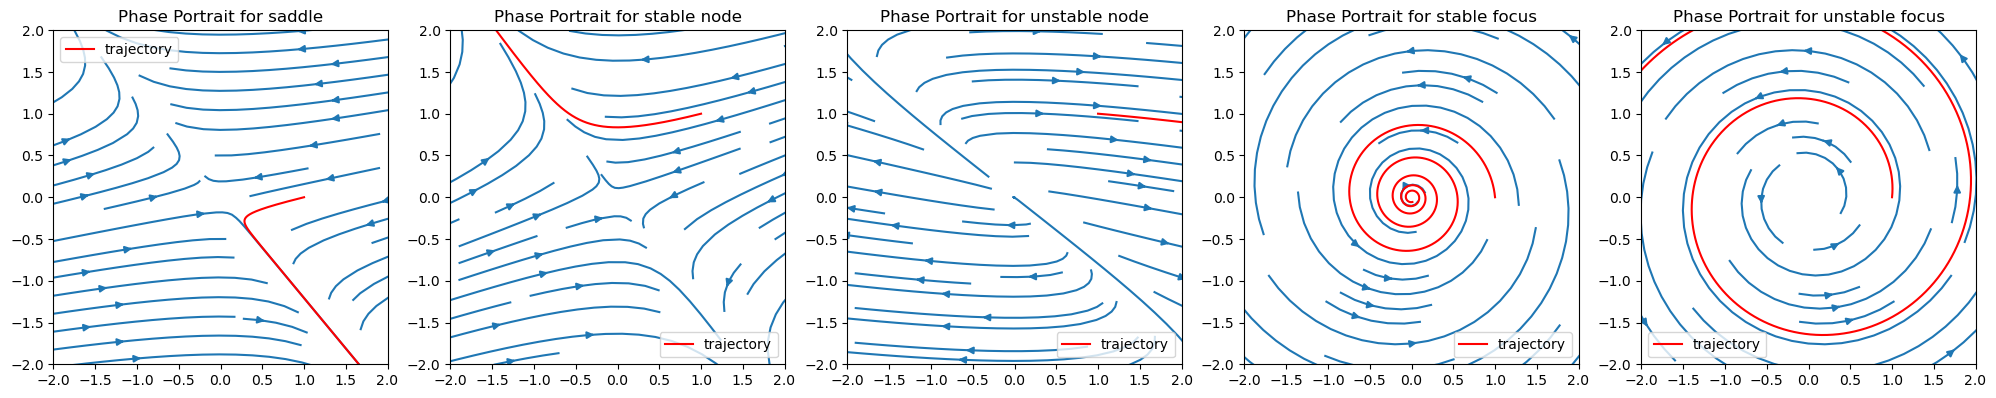

In [2]:
# Define the alpha values for different types of equilibria
alpha_values = {'saddle': -1, 'stable node': -0.5, 'unstable node': 1.5, 'stable focus': -0.1, 'unstable focus': 0.1}

# Define the grid for plotting
w = 3  # this defines the width of the grid in both x and y directions
Y, X = np.mgrid[-w:w:100j, -w:w:100j]  # creates a complex grid for phase portrait

# Set up the figure for multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=len(alpha_values), figsize=(20, 5))

# Define omega for the rotation component of foci
omega = 1

# Loop through each alpha value and plot the corresponding phase portrait
for i, (label, alpha) in enumerate(alpha_values.items()):

    # Define the matrix A_alpha for each case, including foci
    if 'focus' in label:
        # For foci, the matrix has off-diagonal terms of opposite signs
        A_alpha = np.array([[alpha, -omega if 'stable' in label else omega],
                            [omega if 'stable' in label else -omega, alpha]])
    else:
        # Define the matrix A_alpha for each case
        A_alpha = np.array([
            [alpha, alpha],
            [-1/4, 0]
        ])

    # Get the current subplot axis
    ax = axes[i]

    # plot the phase portrait on the given x axis
    plot_phase_portrait(A_alpha, X, Y, ax) 

    # Euler's method to construct and plot a trajectory, choosing initial conditions close to the origin
    if 'stable node' in label:
        y0 = np.array([1.0, 1.0]) # start further away from the equilibrium for stabel node
        end_time = 20 # longer time span for stable node to see the convergence
    elif 'node' in label: # unstable node
        y0 = np.array([0.1, 0.1]) #initial conditions close to the equilibrium for unstable node
        end_time = 10 #time span might be sufficient for unstable
        num_points = 1000 # number of points for the euler method
    else: #for saddle and foci
        y0 = np.array([1.0, 0.0]) # starting further from the equilibrium
        end_time = 30 # longer time span to observe the full behaviour
        num_points = end_time * 100 # increase number of points for finer resolution

    time = np.linspace(0, end_time, num_points) # time array for the euler method
    yt, time = solve_euler(lambda y: A_alpha @ y, y0, time) # solve ODE

    """
    y0 = np.array([0.1, 0.1]) if 'node' in label else np.array([0.2, 0])
    #if label != 'saddle' else np.array([-0.1, 0.1])
    time = np.linspace(0, 10, 1000)  # finer time resolution for better accuracy
    yt, time = solve_euler(lambda y: A_alpha @ y, y0, time)
    """
   
    # Then plot the trajectory over it
    ax.plot(yt[:, 0], yt[:, 1], 'r', label='trajectory')

    # Adjust axes limits and aspect ratio
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_aspect('equal')

    # Pretify each subplot
    ax.set_title(f"Phase Portrait for {label}")
    ax.legend()

# Adjust layout
plt.tight_layout()
